**Almas Fathin Irbah**
> Dataset : Rock Paper Scissors \
> Sumber : Dicoding \
> Link Dataset : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

***Library***

In [ ]:
# Library u/ ekstrak dan atur lokasi 
import zipfile
import os
import glob 
import warnings

# Library u/ machine learning Tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Library u/  upload file gcolabs dan plot
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

***Get Dataset from Dicoding***

In [ ]:
# Download dataset menggunakan wget
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-15 03:33:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.59MB/s    in 89s     

2021-07-15 03:35:15 (3.47 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



***Extract Dataset***

In [ ]:
# Extract zip file
ekstrak_zip = 'rockpaperscissors.zip'
out_zip = zipfile.ZipFile(ekstrak_zip, 'r')
out_zip.extractall('/dataset')
out_zip.close()

***Setting Location Dataset***

In [ ]:
# Setting location dataset
dir_dataset = "/dataset/rockpaperscissors/rps-cv-images"
dir_paper = os.path.join("/dataset/rockpaperscissors/rps-cv-images/paper")
dir_rock = os.path.join("/dataset/rockpaperscissors/rps-cv-images/rock")
dir_scissors = os.path.join("/dataset/rockpaperscissors/rps-cv-images/scissors")

In [ ]:
# Checking dataset
total_image = len(list(glob.iglob("/dataset/rockpaperscissors/rps-cv-images/*/*.*", recursive=True)))
print("Total Data Image JPEG     : ",total_image)

total_paper = len(os.listdir(dir_paper))
total_rock = len(os.listdir(dir_rock))
total_scissors = len(os.listdir(dir_scissors))

# Display total dataset image
print("Total Data Paper Image      : ",total_paper)
print("Total Data Rock Image       : ",total_rock)
print("Total Data Scissors Image  : ",total_scissors)

Total Data Image JPEG     :  2188
Total Data Paper Image      :  712
Total Data Rock Image       :  726
Total Data Scissors Image  :  750


***Implementation*** 

In [ ]:
# Creating train and validation data generator 
# For Augmentation Image

# Validation size is 20% of dataset
val_size = 0.2

Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

***Split dataset to train and validation | Validation size 20%***

In [ ]:
# Setting width and height image
img_width = 150
img_height = 150

# Train and Validation generator  with categorical mode
Train_generator = Train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


***Model Sequential + Conv2D + Dropout Regularization***

In [ ]:
# Creating model to Sequential

Model = Sequential(
    [
     # Activation menggunakan relu + softmax
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (img_width,img_height,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),

     # Droupout
     Dropout(0.2),
     
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)

***Compiling model by optimizer***

In [ ]:
# Using Optimizer 'Adam' with learning rate 0.00146
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

***Using Learning Rate Schedule and Callbacks***

In [ ]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

***Process training dataset fit***

In [ ]:
# Process Training 
batch_size = 16

with tf.device("/device:GPU:0"):
  history = Model.fit(Train_generator, 
                    epochs =  10, 
                    steps_per_epoch = 1751//batch_size, 
                    validation_data = Validation_generator, 
                    verbose = 1, 
                    validation_steps = 437//batch_size,
                    callbacks =[lr_schedule, tb_callback])

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 64s 578ms/step - loss: 0.9596 - accuracy: 0.5222 - val_loss: 0.7331 - val_accuracy: 0.6921
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 62s 572ms/step - loss: 0.5020 - accuracy: 0.8121 - val_loss: 0.4068 - val_accuracy: 0.8657
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 62s 567ms/step - loss: 0.3658 - accuracy: 0.8761 - val_loss: 0.2649 - val_accuracy: 0.9074
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
109/109 [==============================] - 62s 569ms/step - loss: 0.2710 - accuracy: 0.8997 - val_loss: 0.2630 - val_accuracy: 0.9028
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00100

***Plotting accuraccy and loss***

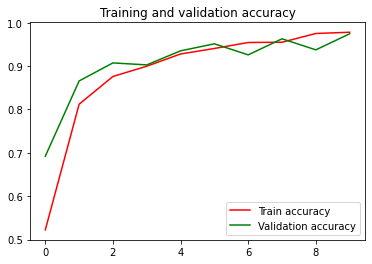

<Figure size 432x288 with 0 Axes>

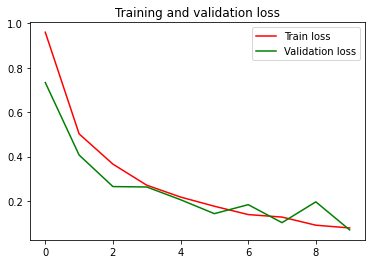

<Figure size 432x288 with 0 Axes>

In [ ]:
# Get accuracy value
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get Loss value
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot Accruracy
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

***Predicting Image***

Saving istockphoto-1224988175-640x640.jpg to istockphoto-1224988175-640x640 (1).jpg


Predict Result :  [0. 0. 1.] 

Image Category : Scissor


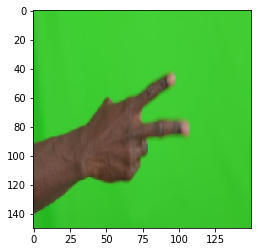

In [ ]:
# Upload File to google colabs
uploaded = files.upload()

# Condition 
for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Create numpy vstack array for prediction result
  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)
  
  print("\n")
  print('Predict Result : ',classes[0],'\n')

  if classes[0][0] == 1:
    print('Image Category : Paper')
  elif classes[0][1] == 1:
    print('Image Category : Rock')
  else:
    print('Image Category : Scissor')

***Export TF-Lite***

In [ ]:
# Remove warning
warnings.filterwarnings('ignore')

# Convert model.
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()

# Save the model.
with open('RPS_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjz8ap_py/assets


INFO:tensorflow:Assets written to: /tmp/tmpjz8ap_py/assets
